In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from numpy import transpose as T
from pathlib import Path as Path
import datetime
import warnings

In [3]:
def power_law(x, a, b):
    return a * np.power(x, b)

/var/folders/q1/prwbhm6j6x1gcchb7r0p2kyh0000gn/T/ipykernel_25721/1834830990.py:59: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(labels, loc="center right", fontsize=12)


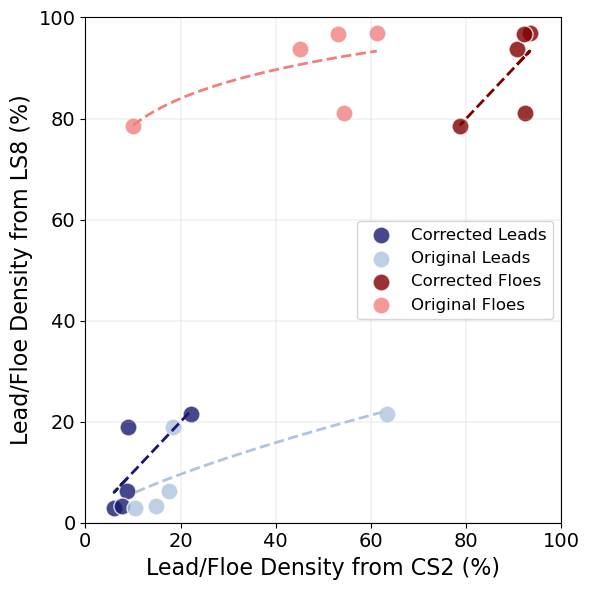

In [4]:
# Figure 7 - Swiggs et al. (2024) 
# Input data & plot

# Input monthly mean leads and floes from Landsat 8 (LS8) and CryoSat-2 (CS2)
floes = pd.read_csv('.../Floes.csv')
leads = pd.read_csv('.../Leasd.csv')     

# Input correction parameters
correction_parameters_floes = pd.read_csv('.../PowerLaw_Parameters_Floes.csv')
correction_parameters_leads = pd.read_csv('.../PowerLaw_Parameters_Leads.csv')

# Initialise figure
fig, ax = plt.subplots(figsize=[6, 6])

# Leads #
lead_a = correction_parameters_leads['Constant (a)'].values
lead_b = correction_parameters_leads['Exponent (k)'].values

# Plot corrected data
plt.scatter(leads['CS2 Scaled Means %'], leads['LS8 Means %'], color='midnightblue', edgecolor='white', s=150, alpha=0.8)
plt.plot(leads['CS2 Scaled Means %'], power_law(leads['CS2 Original Means %'], 
        lead_a,lead_b),color='midnightblue', linestyle='--', linewidth=2)

lead_x_range = np.linspace(min(leads['CS2 Original Means %']), max(leads['CS2 Original Means %']), 100)

lead_trendline = power_law(lead_x_range,lead_a,lead_b)

# Plot original data
plt.scatter(leads['CS2 Original Means %'], leads['LS8 Means %'], color='lightsteelblue', edgecolor='white', s=150,alpha=0.8)
plt.plot(lead_x_range, lead_trendline, color='lightsteelblue', linestyle='--', linewidth=2)

# Floes #
floe_a = correction_parameters_floes['Constant (a)'].values
floe_b = correction_parameters_floes['Exponent (k)'].values

# Plot corrected data
plt.scatter(floes['CS2 Scaled Means %'], floes['LS8 Means %'], color='maroon', edgecolor='white', s=150, alpha=0.8)
plt.plot(floes['CS2 Scaled Means %'], power_law(floes['CS2 Original Means %'], 
        floe_a,floe_b), color='maroon', linestyle='--', linewidth=2)

floe_x_range = np.linspace(min(floes['CS2 Original Means %']), max(floes['CS2 Original Means %']), 100)

floe_trendline = power_law(floe_x_range,floe_a,floe_b)

# Plot original data
plt.scatter(floes['CS2 Original Means %'], floes['LS8 Means %'], color='lightcoral', edgecolor='white', s=150,alpha=0.8)
plt.plot(floe_x_range, floe_trendline, color='lightcoral', linestyle='--', linewidth=2)

ax.set_ylabel('Lead/Floe Density from LS8 (%)', fontsize=16)
ax.set_xlabel('Lead/Floe Density from CS2 (%)', fontsize=16)
ax.set_ylim([0, 100])
ax.set_xlim([0, 100])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linewidth=0.2)
plt.tight_layout()
labels = ['Corrected Leads', '_', 'Original Leads','_','Corrected Floes','_','Original Floes']
plt.legend(labels, loc="center right", fontsize=12)


plt.show()
